In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
red_wine = pd.read_csv('datasets/winequality-red.csv', delimiter=';').dropna()
white_wine = pd.read_csv('datasets/winequality-white.csv', delimiter=';').dropna()
red_wine['state'] = 1
white_wine['state'] = 0
df = pd.concat([red_wine, white_wine])
df = sk.utils.shuffle(df, random_state=0)
df = sk.utils.shuffle(df, random_state=0)

print(df['state'][0:15])

416     0
2008    0
1135    1
2133    0
59      0
46      1
2385    0
696     0
1041    1
3958    0
3352    0
1136    0
3143    0
1104    0
4783    0
Name: state, dtype: int64


In [10]:
x = df.drop('state', axis=1)
y = df[['state']]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# x_test = scaler.transform(x_test)
print()

[0 0 1 ... 0 0 0]


In [18]:
methods = ['uniform', 'distance']

errors = {'uniform': [], 'distance': [], 'ridge': [], 'lasso': []}
for method in methods:
    for i in range(1, 40):
        classifier = KNeighborsClassifier(algorithm='auto',
                                          leaf_size=30,
#                                           metric='mikowski',
#                                           metric_params=None,
                                          n_jobs=1,
                                          n_neighbors=i,
                                          p=2,
                                          weights=method) # 'distance', 'uniform'
        
#         classifier.fit(x_train, y_train)
#         y_pred = classifier.predict(x_test)
        
#         y_pred = np.array([y_pred]).T
        
        scores = cross_val_score(classifier, x, y['state'].values, cv=10)
        errors[method].append(scores.mean())

#         errors[method].append(np.mean(y_pred != y_test))

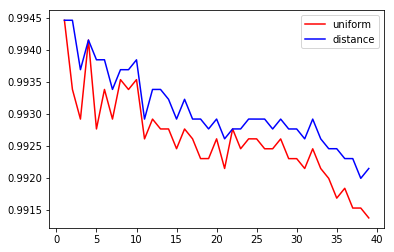

In [19]:
plt.plot(range(1, 40), errors['uniform'], c='red', label='uniform')
plt.plot(range(1, 40), errors['distance'], c='blue', label='distance')



plt.legend()
plt.show()

In [26]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
errors['ridge'] = []
errors['lasso'] = []
score = {'ridge': [], 'lasso': []}
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)

    scores_ridge = cross_val_score(ridge, x, y['state'].values, cv=10)
    scores_lasso = cross_val_score(lasso, x, y['state'].values, cv=10)
    errors['ridge'].append(scores.mean())
    errors['lasso'].append(scores_lasso.mean())


In [27]:
# print(len(alphas))
print(len(errors['lasso']))
print(len(alphas))
print(alphas)

print(errors['lasso'])

10
10
[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]
[0.8581193730870222, 0.8581193731381973, 0.8581193782189059, 0.8581639753995715, 0.857985522757929, 0.8435938788534816, -0.0017242873449614172, -0.0017242873449614172, -0.0017242873449614172, -0.0017242873449614172]


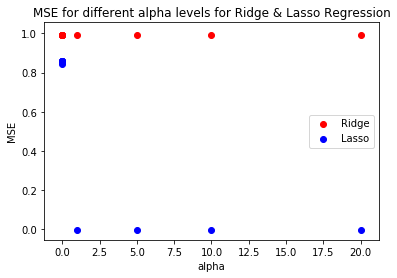

In [28]:
plt.scatter(alphas, errors['ridge'], c='red', label='Ridge')
plt.scatter(alphas, errors['lasso'], c='blue', label='Lasso')

plt.title("MSE for different alpha levels for Ridge & Lasso Regression")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()

plt.show()